In [1366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings

In [1367]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading and Understanding Data

In [1368]:
housing = pd.read_csv('train.csv')
print(housing.info())
print(housing.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1369]:
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [1370]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [1371]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data cleaning and EDA

- Missing Value Treatment

In [1372]:
missing_info = pd.DataFrame(round(100*(housing.isnull().sum()/len(housing.index)),2))
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

,0
LotFrontage,17.74
Alley,93.77
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07


In [1373]:
#dropping cols with large missing values
missing_val_cols = ['MiscFeature','Fence','PoolQC','Alley','FireplaceQu']
housing.drop(missing_val_cols,inplace=True,axis=1)
print(housing.shape)
missing_info = pd.DataFrame(round(100*(housing.isnull().sum()/len(housing.index)),2))
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

(1460, 76)


,0
LotFrontage,17.74
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07
GarageType,5.55


#### Treating garage related missing values

In [1374]:
garageCols = housing.columns[housing.columns.str.startswith('Gar')]
for col in garageCols:
    if (col != "GarageYrBlt") & (col != "GarageArea"):
        print("===={}====".format(col))
        print(housing[col].value_counts())
        print("\n")

====GarageType====
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


====GarageFinish====
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


====GarageCars====
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


====GarageQual====
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


====GarageCond====
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64




In [1375]:
#checking null values

housing.loc[housing['GarageType'].isnull(),housing.columns.str.startswith('Gar')].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN


#### Inferences:
- For the properties where garageType is NaN,the value for GarageCars and GarageCars is 0.
- From this we can infer that these properties do not have a garage of its own. 
- Therefore, instead of deleting these rows, replacing the NaN values with 'NA' for No Garage as described in the data dictionary
- For continuous variable 'GarageYrBlt' missing value will be replaced with 0. (Year column will be used to calculate age of the garage if we replace with max date, it will be considered as newly constructed depending on age. Therefore using 0.)

In [1376]:
housing.loc[housing['GarageType'].isnull(),['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'

In [1377]:
housing['GarageYrBlt'].min()

1900.0

In [1378]:
housing['GarageYrBlt'] = housing[['GarageYrBlt','YearBuilt']].apply(lambda x: x['YearBuilt'] if np.isnan(x['GarageYrBlt']) else x['GarageYrBlt'],axis=1)


#### Treating basement related missing values

In [1379]:
bsmtCols = housing.columns[housing.columns.str.startswith('Bsmt')]
for col in bsmtCols:
    if (col != "BsmtFinSF1") & (col != "BsmtFinSF2") & (col != "BsmtUnfSF"):
        print("===={}====".format(col))     
        print(housing[col].value_counts())
        print("\n")

====BsmtQual====
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


====BsmtCond====
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


====BsmtExposure====
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


====BsmtFinType1====
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


====BsmtFinType2====
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


====BsmtFullBath====
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


====BsmtHalfBath====
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64




In [1380]:
housing.loc[housing['BsmtQual'].isnull(),housing.columns.str.startswith('Bsmt')].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0


There is one row where BsmtCond and BsmtExposure is not available but other basement details are available. Lets keep this row for now and replacing other missing values for basement with NA as No Basement as mentioned in Data Dictionary


In [1381]:
housing.loc[housing['BsmtQual'].isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = 'NA'

#### Treating BsmtExposure

In [1382]:
housing.loc[housing['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


In [1383]:
print(housing['BsmtExposure'].value_counts())

No    953
Av    221
Gd    134
Mn    114
NA     37
Name: BsmtExposure, dtype: int64


It does have other values of basement. Replacing the missing value with No - No Exposure

In [1384]:
housing.loc[housing['BsmtExposure'].isnull(),['BsmtExposure']] = 'No'

#### Treating BsmtFinType2

In [1385]:
housing.loc[housing['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000


In [1386]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

It cant be replaced with 'Unf' as we see that it has BsmtFinSF2 (type 2 finished square feet) value associated.

In [1387]:
pd.DataFrame(housing.loc[housing['BsmtFinType1']=='GLQ'].groupby(by=['BsmtFinType1','BsmtFinType2'])['BsmtFinSF2'].describe())

count    mean         std    min     25%    50%  \
BsmtFinType1 BsmtFinType2                                                    
GLQ          ALQ             4.0  392.75  236.580325   80.0  278.00  441.5   
             BLQ             2.0  618.50  709.228102  117.0  367.75  618.5   
             LwQ            10.0  215.60  136.351018   40.0  146.25  183.0   
             Rec             9.0  307.00  286.759917   64.0  180.00  215.0   
             Unf           392.0    0.00    0.000000    0.0    0.00    0.0   

                              75%     max  
BsmtFinType1 BsmtFinType2                  
GLQ          ALQ           556.25   608.0  
             BLQ           869.25  1120.0  
             LwQ           221.50   472.0  
             Rec           336.00  1029.0  
             Unf             0.00     0.0

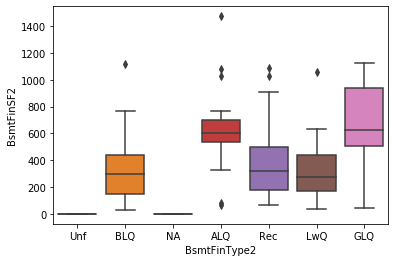

In [1388]:
sns.boxplot(y="BsmtFinSF2",x="BsmtFinType2",data=housing)

Based on the value of BsmtFinType1 (GLQ), and BsmtFinSF2(479) replacing missing value for BsmtFinType2 with 'BLQ'.

In [1389]:
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('BLQ')

#### Treating missing values for `LotFrontage`

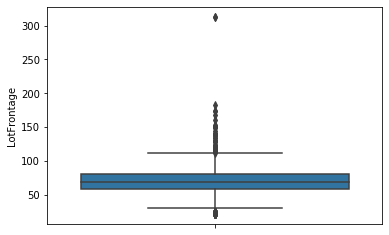

In [1390]:
sns.boxplot(y = housing['LotFrontage'])

In [1391]:
housing['LotFrontage'].describe(percentiles = (0.25,0.4,0.5,0.75,0.8,0.9))

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
40%        63.000000
50%        69.000000
75%        80.000000
80%        85.000000
90%        96.000000
max       313.000000
Name: LotFrontage, dtype: float64

(array([ 42.,  11.,  32.,  44.,  76.,  67., 183., 116., 147., 130., 141.,
         60.,  39.,  35.,  23.,  12.,  13.,   6.,   6.,   3.,   3.,   2.,
          3.,   1.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21.  ,  26.84,  32.68,  38.52,  44.36,  50.2 ,  56.04,  61.88,
         67.72,  73.56,  79.4 ,  85.24,  91.08,  96.92, 102.76, 108.6 ,
        114.44, 120.28, 126.12, 131.96, 137.8 , 143.64, 149.48, 155.32,
        161.16, 167.  , 172.84, 178.68, 184.52, 190.36, 196.2 , 202.04,
        207.88, 213.72, 219.56, 225.4 , 231.24, 237.08, 242.92, 248.76,
        254.6 , 260.44, 266.28, 272.12, 277.96, 283.8 , 289.64, 295.48,
        301.32, 307.16, 313.  ]),
 <a list of 50 Patch objects>)

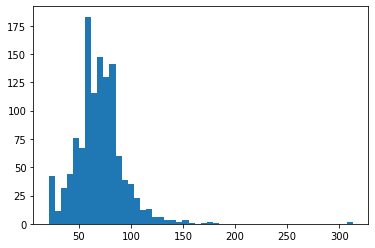

In [1392]:
plt.hist(housing['LotFrontage'],bins=50)

In [1393]:
print(housing['LotFrontage'].mean())
print(housing['LotFrontage'].median())

70.04995836802665
69.0


We noticed that all the values that were missing for `LotFrontage` - (Linear feet of street connected to property) have `Paved` Street (Type of road access to property).
Therefore, replacing the missing values with the median value of Paved Streets.

In [1394]:
housing.loc[pd.isnull(housing['LotFrontage']),'LotFrontage'] = 69.0

#### Treating Electrical

In [1395]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1396]:
housing.loc[housing['Electrical'].isnull(),['Electrical']] = housing['Electrical'].mode()

#### Treating MasVnrType

In [1397]:
housing.loc[housing['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


In [1398]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1399]:
housing.loc[housing['MasVnrType']=='None',['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0


In [1400]:
#replacing missing MasVnrType with None and MasVnrArea with 0.0
housing.loc[housing['MasVnrArea'].isnull(),['MasVnrArea']] = 0.0
housing.loc[housing['MasVnrType'].isnull(),['MasVnrType']] = 'None'


In [1401]:
missing_info = pd.DataFrame(round(100*(housing.isnull().sum()/len(housing.index)),2))
missing_info = missing_info.loc[missing_info[0]!=0]
missing_info

,0
Electrical,0.07


- Data type check

In [1402]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)
housing['MSSubClass'] = housing['MSSubClass'].astype(str)
#housing['OverallQual'] = housing['OverallQual'].astype(str)
#housing['OverallCond'] = housing['OverallCond'].astype(str)

- Derived Variables

In [1403]:
yearCols = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
#Coverting year cols 
housing['AgeBuilt'] = max(housing['YearBuilt']) - housing['YearBuilt']
housing['AgeRemodAdd'] = max(housing['YearRemodAdd']) - housing['YearRemodAdd']
housing['AgeGarageBlt'] = max(housing['GarageYrBlt']) - housing['GarageYrBlt']
housing['AgeSold'] = max(housing['YrSold']) - housing['YrSold']
housing[['AgeBuilt','AgeRemodAdd','AgeGarageBlt','AgeSold']].describe()
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

#### Exploratory Data Analysis

In [1404]:
housing.drop(['Id'],axis=1,inplace=True)
catColsData = housing.select_dtypes(include=['object'])
catCols = catColsData.columns
numCols = list(set(housing.columns) - set(catCols))
len(catCols)

39

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

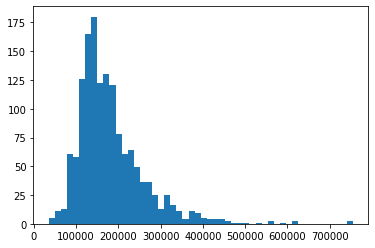

In [1405]:
# checking target variable
housing['SalePrice'].describe(percentiles = (0.25,0.4,0.5,0.75,0.8,0.9,0.95))
plt.hist(housing['SalePrice'],bins=50)

#### Inference: 
We notice that the data is skewed. Skewness in the data is because of the presence of outliers.
To handle these outlier we choose not to delete as the houses with higher sales price are indispensable.
Tranforming the Values in SalePrice between 0 to 1  will help in normalizing the data without losing any information.
Lets use sigmoid function to transform our target variable

In [1406]:
housing['SalePrice'] = housing['SalePrice'].astype(float)
housing['SalePrice'] = np.log(housing['SalePrice'])
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

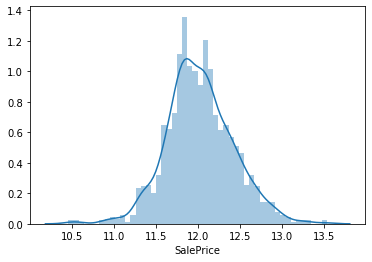

In [1407]:
sns.distplot(housing['SalePrice'],bins=50)

In [1408]:
housing['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### Visualizing Categortical Variables

In [1409]:
def boxplot_catVariables(cols):
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(13,3,i+1)
        sns.boxplot(x = cols[i], y = 'SalePrice', data = housing)
    plt.tight_layout()
    plt.show()
    
#boxplot_catVariables(catCols[:-1])

In [1410]:
def countplot_catVariables(cols):
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(13,3,i+1)
        sns.countplot(x = cols[i], data = housing)
    plt.show()
    
#countplot_catVariables(catCols[:-1])

In [1411]:
#housing[numCols].corr()

In [1412]:
plt.figure(figsize=(20, 20))
#sns.heatmap(housing[numCols].corr())

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

Inferences: Some of the highly correlated variables are '
- BsmtFinSF1 and BsmtUnfSF
- TotalRoomsAbvGround and GrLivArea
- Garage Area and Garage Cars
- Sale Price is highly corelated
    - Total rooms Above Ground
    - Overall Quality
    - Ground Living Area
    - Total Bsmnt Surface Area
    - Enclosed Porch and Year Built
    - Age

In [1413]:
# Dropping highly corelated variables
housing.drop(['BsmtUnfSF','TotRmsAbvGrd','GarageCars','AgeGarageBlt'],axis=1,inplace=True)


## Data Preparation

- Create dummy variables for categorical data

In [1414]:
housing_dummies = pd.get_dummies(housing[catCols],drop_first=True)
housing_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,

In [1415]:
housing_dummies.shape

(1460, 219)

In [1416]:
housing = housing.drop(catCols,inplace=False,axis=1)
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeBuilt,AgeRemodAdd,AgeSold
0,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,12.247694,7,7,2
1,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,12.109011,34,34,3
2,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,12.317167,9,8,2
3,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,11.849398,95,40,4
4,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,12.429216,10,10,2


In [1417]:
housing = pd.concat([housing,housing_dummies],axis=1)

In [1418]:
housing.shape

(1460, 251)

In [1419]:
X = housing.drop(['SalePrice'],axis=1,inplace=False)
y = housing['SalePrice']
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,AgeBuilt,AgeRemodAdd,AgeSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0

In [1420]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [1425]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [1426]:
X_train.shape

(1022, 250)

In [1427]:
X_train[:10]

array([[-0.1162956 , -0.47394256, -0.78071743, ..., -0.11785113,
         0.45923902, -0.29142013],
       [ 0.9258868 , -0.05681892,  0.64919872, ..., -0.11785113,
         0.45923902, -0.29142013],
       [-0.79597978, -0.16935297, -0.06575935, ..., -0.11785113,
         0.45923902, -0.29142013],
       ...,
       [ 0.42745174,  0.17883264,  1.3641568 , ..., -0.11785113,
         0.45923902, -0.29142013],
       [-0.02567105, -0.18848085, -2.21063359, ..., -0.11785113,
         0.45923902, -0.29142013],
       [-0.38816927, -0.31324897, -0.06575935, ..., -0.11785113,
         0.45923902, -0.29142013]])

#### Using RFE for initial feature elimination.
Final number of features to be used in the model are 250. We will eliminate first 50 to 100 features using RFE and then later Ridge and Lasso will be applied using these features. 

In [1428]:
folds =5
hyper_params = [{"n_features_to_select": [1,50,60,70,80,90,100,110]}]

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe,
                       param_grid = hyper_params,
                       scoring= 'neg_mean_squared_error',
                       cv = folds,
                       verbose = 3,
                       return_train_score = True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_features_to_select=1, score=(train=-0.140, test=-0.127), total=   6.1s
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_features_to_select=1, score=(train=-0.134, test=-0.150), total=   5.8s
[CV] n_features_to_select=1 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV]  n_features_to_select=1, score=(train=-0.157, test=-0.158), total=   5.8s
[CV] n_features_to_select=1 ..........................................
[CV]  n_features_to_select=1, score=(train=-0.147, test=-0.129), total=   5.7s
[CV] n_features_to_select=1 ..........................................
[CV]  n_features_to_select=1, score=(train=-0.137, test=-0.156), total=   5.8s
[CV] n_features_to_select=50 .........................................
[CV]  n_features_to_select=50, score=(train=-0.015, test=-9934371742655237761007616.000), total=   6.1s
[CV] n_features_to_select=50 .........................................
[CV]  n_features_to_select=50, score=(train=-0.017, test=-41164483079237816324980736.000), total=   5.7s
[CV] n_features_to_select=50 .........................................
[CV]  n_features_to_select=50, score=(train=-0.021, test=-782982539853813216612188160.000), total=   5.8s
[CV] n_features_to_select=50 .........................................
[CV]  n_features_to_se

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 50, 60, 70, 80, 90, 100,
                                                   110]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=3)

In [1429]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.845212,0.132051,0.003199,0.004400,1,{'n_features_to_select': 1},-1.269944e-01,-1.496669e-01,-1.577657e-01,-1.288363e-01,-1.562152e-01,-1.438848e-01,1.333950e-02,1,-0.140157,-0.134464,-0.156583,-0.147087,-0.136881,-0.143034,0.007995
1,5.864199,0.161589,0.001601,0.000489,50,{'n_features_to_select': 50},-9.934372e+24,-4.116448e+25,-7.829825e+26,-3.708015e+25,-7.038873e+24,-1.753464e+26,3.037599e+26,7,-0.014851,-0.017122,-0.021248,-0.026078,-0.015259,-0.018911,0.004239
2,5.719413,0.143230,0.001395,0.000506,60,{'n_features_to_select': 60},-6.899943e+22,-1.228697e+27,-1.678315e+25,-3.743991e+25,-1.399344e+25,-2.600913e+26,4.853385e+26,8,-0.012037,-0.014730,-0.012684,-0.020390,-0.012360,-0.014440,0.003120
3,5.551798,0.117191,0.001210,0.000397,70,{'n_features_to_select': 70},-1.906859e+23,-2.053692e+25,-1.998769e+25,-1.970118e+25,-3.254974e+23,-1.214490e+25,9.713443e+24,4,-0.009456,-0.010024,-0.010111,-0.010756,-0.010003,-0.010070,0.000414
4,5.381611,0.062047,0.001200,0.000398,80,{'n_features_to_select': 80},-2.939026e+22,-2.983516e+24,-3.746798e+25,-8.778842e+23,-9.198731e+24,-1.009466e+25,1.404094e+25,3,-0.008296,-0.009067,-0.008720,-0.009051,-0.009229,-0.008873,0.000332


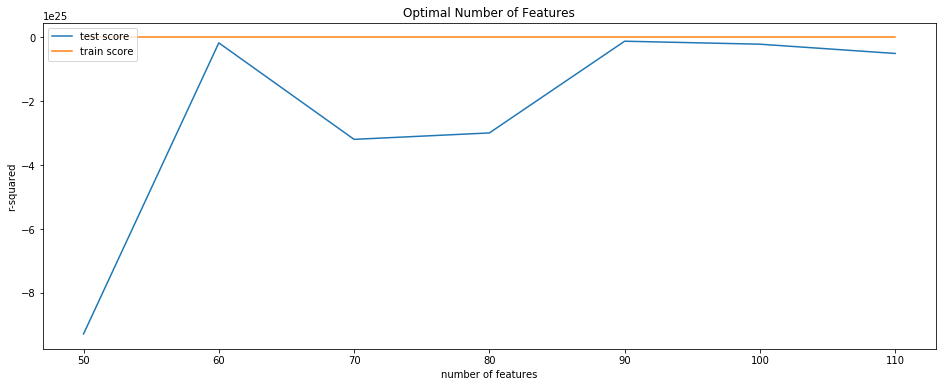

In [1079]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [1430]:
print(model_cv.best_params_)
print(np.sqrt(-model_cv.best_score_))

{'n_features_to_select': 1}
0.3793214785483455


Using RFE to select iniital 100 features

In [1431]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,90)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=90, step=1, verbose=0)

In [1432]:
rfeCols = list(X.columns[rfe.support_])
rfeCols

['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'AgeBuilt',
 'AgeRemodAdd',
 'MSSubClass_160',
 'MSSubClass_190',
 'MSSubClass_30',
 'MSSubClass_45',
 'MSSubClass_75',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandSlope_Sev',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Condition1_Norm',
 'Condition2_PosN',
 'Condition2_RRAe',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Unf',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior2nd_AsphSh

Using these columns for building final model with Ridge Regression

In [1433]:
X_rfe = X[rfeCols]
X_train,X_test,y_train,y_test = train_test_split(X[rfeCols],y,test_size=0.3,random_state=100)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Ridge Regression

In [1434]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20,50,100, 200, 500, 1000]}

ridge = Ridge()
folds = 5

model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_squared_error',
                       cv = folds,
                       return_train_score = True,
                       verbose =1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [1435]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005200,0.000400,0.001000,6.641573e-07,0.0001,{'alpha': 0.0001},-0.010996,-0.054275,-0.027877,-0.057686,-0.008977,-0.031964,0.020710,29,-0.007973,-0.008095,-0.007957,-0.008287,-0.008402,-0.008143,0.000175
1,0.004981,0.000882,0.001211,4.225023e-04,0.001,{'alpha': 0.001},-0.010996,-0.054275,-0.027876,-0.057681,-0.008977,-0.031962,0.020709,28,-0.007973,-0.008095,-0.007957,-0.008287,-0.008402,-0.008143,0.000175
2,0.005011,0.000634,0.000803,4.013677e-04,0.01,{'alpha': 0.01},-0.010995,-0.054274,-0.027872,-0.057632,-0.008976,-0.031951,0.020697,27,-0.007973,-0.008095,-0.007957,-0.008287,-0.008402,-0.008143,0.000175
3,0.005988,0.000896,0.000998,2.724239e-06,0.05,{'alpha': 0.05},-0.010988,-0.054273,-0.027854,-0.057414,-0.008972,-0.031901,0.020646,26,-0.007973,-0.008095,-0.007957,-0.008287,-0.008403,-0.008143,0.000175
4,0.005603,0.000490,0.000999,8.714517e-07,0.1,{'alpha': 0.1},-0.010980,-0.054271,-0.027831,-0.057143,-0.008967,-0.031840,0.020583,25,-0.007973,-0.008095,-0.007957,-0.008287,-0.008403,-0.008143,0.000175


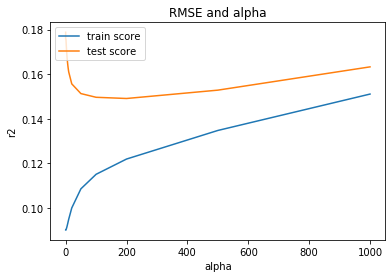

In [1437]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_train_score']))
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_test_score']))
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("RMSE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1438]:
print(model_cv.best_params_)
print(np.sqrt(-model_cv.best_score_))

{'alpha': 200}
0.14910817445726698


In [1439]:
alpha = 200
ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.01271355,  0.06784683,  0.02832273,  0.00728265,  0.02151497,
        0.04330663,  0.0455874 , -0.00290537,  0.06943392,  0.02244261,
       -0.0094989 ,  0.02558652,  0.03186156, -0.03784911, -0.03152027,
       -0.02326043, -0.0040049 , -0.02009755, -0.00380701,  0.00149122,
       -0.00101592,  0.00823577,  0.00633963,  0.02869815, -0.00489919,
       -0.00085367,  0.01795945, -0.01866192, -0.01387367,  0.02058358,
        0.0197715 ,  0.01943793, -0.03331827, -0.0031096 , -0.0040049 ,
       -0.00101592,  0.0005848 , -0.0027039 , -0.01074251, -0.00203262,
        0.00393793,  0.0337673 ,  0.01031073,  0.00863804,  0.00875718,
        0.02042596,  0.01224864,  0.02349771,  0.0001209 , -0.01010254,
        0.01394197, -0.00151091,  0.0001209 , -0.00151091,  0.        ,
       -0.00646692, -0.00186229,  0.        ,  0.00106531,  0.01941353,
       -0.00932525, -0.00290533, -0.02301454, -0.00290533,  0.02021745,
       -0.00290533, -0.00290533, -0.00290533,  0.00634744,  0.02

In [1441]:
y_train_pred = ridge.predict(X_train) 
y_test_pred = ridge.predict(X_test)
print(r2_score(y_train,y_train_pred))
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_test,y_test_pred))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

0.9046408653061482
0.12246108548046873
0.8652512237094337
0.1489012402663475


In [1442]:
lasso = Lasso()

params = {'alpha':[0.0001,0.0008,0.0009, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0008, 0.0009, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [1443]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.184000,0.015513,0.000801,0.000400,0.0001,{'alpha': 0.0001},-0.010974,-0.053696,-0.027712,-0.055645,-0.008897,-0.031387,0.020113,5,-0.007985,-0.008106,-0.007974,-0.008299,-0.008413,-0.008155,0.000174
1,0.066001,0.009570,0.001001,0.000002,0.0008,{'alpha': 0.0008},-0.010393,-0.053221,-0.027388,-0.044162,-0.009119,-0.028863,0.017675,4,-0.008398,-0.008354,-0.008485,-0.008730,-0.008900,-0.008573,0.000209
2,0.064378,0.004949,0.000814,0.000408,0.0009,{'alpha': 0.0009},-0.010349,-0.053148,-0.027503,-0.042750,-0.009230,-0.028602,0.017401,3,-0.008508,-0.008407,-0.008606,-0.008836,-0.009012,-0.008674,0.000221
3,0.058814,0.010740,0.001001,0.000002,0.001,{'alpha': 0.001},-0.010317,-0.053050,-0.027645,-0.041392,-0.009356,-0.028359,0.017137,2,-0.008630,-0.008460,-0.008734,-0.008953,-0.009134,-0.008782,0.000238
4,0.009009,0.001247,0.001187,0.000399,0.01,{'alpha': 0.01},-0.013170,-0.052072,-0.028334,-0.013684,-0.017152,-0.024898,0.014668,1,-0.019089,-0.012143,-0.017788,-0.019070,-0.019323,-0.017483,0.002724
5,0.004985,0.000022,0.001014,0.000021,0.05,{'alpha': 0.05},-0.025063,-0.046769,-0.037485,-0.026472,-0.034328,-0.034027,0.007904,6,-0.034724,-0.027208,-0.030562,-0.034235,-0.033487,-0.032043,0.002816
6,0.004614,0.000501,0.000401,0.000491,0.1,{'alpha': 0.1},-0.042860,-0.055871,-0.052203,-0.042646,-0.055461,-0.049807,0.005901,7,-0.051131,-0.045730,-0.047579,-0.050345,-0.050158,-0.048989,0.002020
7,0.003792,0.000397,0.000807,0.000403,0.2,{'alpha': 0.2},-0.084759,-0.099823,-0.095448,-0.079571,-0.109550,-0.093827,0.010684,8,-0.093990,-0.092059,-0.092595,-0.092872,-0.093997,-0.093102,0.000773
8,0.003800,0.000400,0.000600,0.000490,0.3,{'alpha': 0.3},-0.132242,-0.147646,-0.146258,-0.127078,-0.169105,-0.144457,0.014635,9,-0.144284,-0.141134,-0.143775,-0.145070,-0.144647,-0.143782,0.001391
9,0.003177,0.000386,0.000823,0.000412,0.4,{'alpha': 0.4},-0.147045,-0.162071,-0.159432,-0.142108,-0.177841,-0.157693,0.012518,10,-0.159909,-0.156136,-0.156725,-0.161117,-0.152206,-0.157219,0.003130


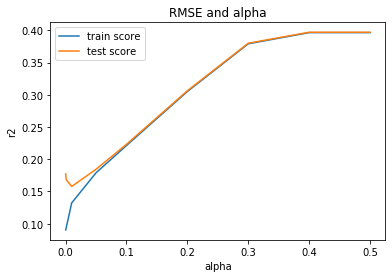

In [1444]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_train_score']))
plt.plot(cv_results['param_alpha'], np.sqrt(-cv_results['mean_test_score']))
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("RMSE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1445]:
print(model_cv.best_params_)
print(np.sqrt(-model_cv.best_score_))

{'alpha': 0.01}
0.15778955948920523


In [1446]:
alpha = 0.01
lasso = Lasso(alpha = alpha)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(r2_score(y_train,y_train_pred))
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_test,y_test_pred))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

0.8844896098502013
0.13478062913094466
0.8621044596693104
0.15062983859350243


In [1447]:
sum(lasso.coef_!=0)

36

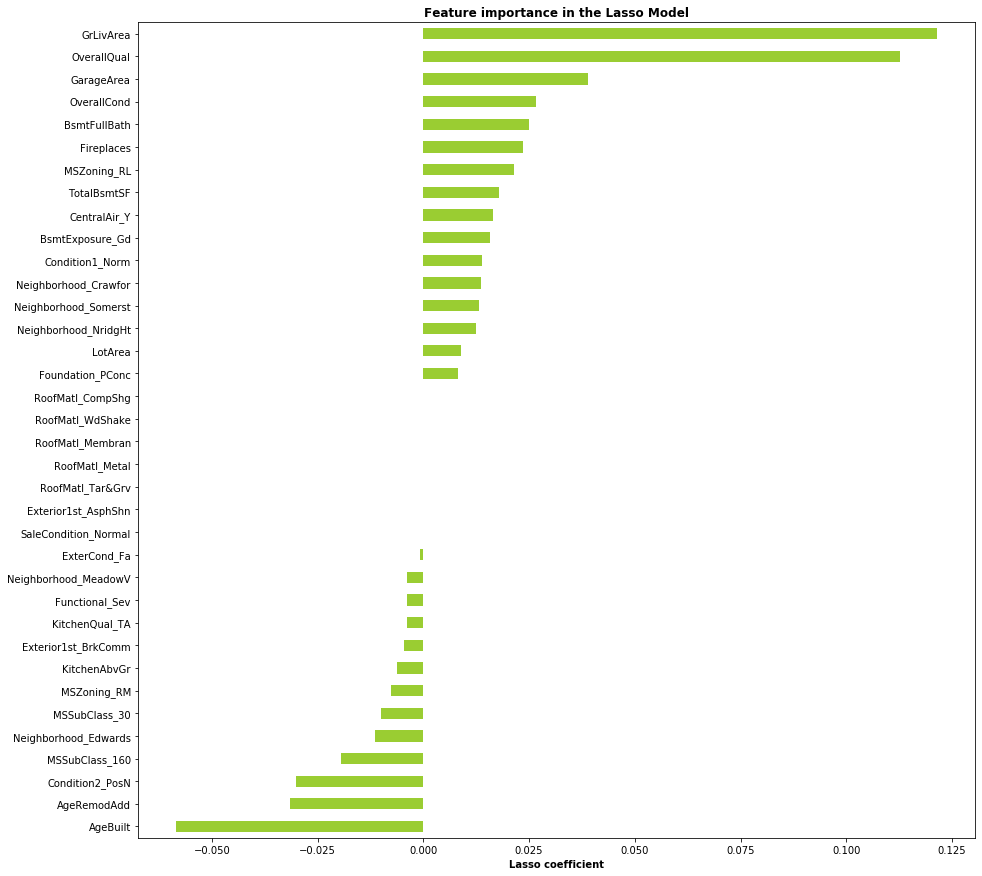

In [1449]:
plt.figure(figsize=(15,15))
coefs = pd.Series(lasso.coef_, index = X_rfe.columns)

imp_coefs = pd.concat([coefs.sort_values().head(20),
                     coefs.sort_values().tail(16)])
imp_coefs.plot(kind = "barh", color='yellowgreen')

plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()